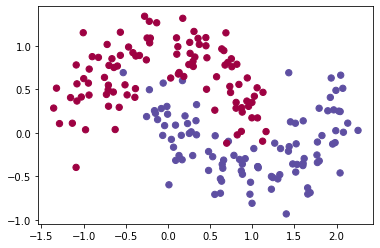

In [143]:
#Importing Libraries
import numpy as np #For calculations
import sklearn #For the dataset
from sklearn import datasets
import matplotlib.pyplot as plt #For plotting
from random import sample
from mpl_toolkits import mplot3d #For 3D plotting
%matplotlib inline
#Generating the dataset
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [2]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [3]:
# Helper function to predict an output (0 or 1)
def predict(model, X):
    X = np.array(X)
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [4]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model

In [5]:
num_examples = len(x) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

# Q1

Iteration: 0 Loss: 0.43238663152549245
Iteration: 1000 Loss: 0.06894653811984068
Iteration: 2000 Loss: 0.0690332780882679
Iteration: 3000 Loss: 0.0707519477749643
Iteration: 4000 Loss: 0.07074831586381623


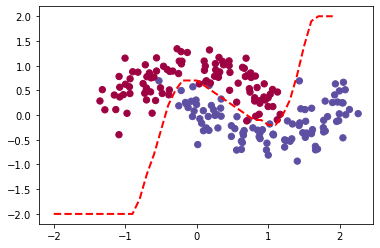

In [6]:
def plotDec(M):
    preds = [[predict(M,[i,j])[0] for j in np.arange(-2,2,0.1)] 
         for i in np.arange(-2,2,0.1)]
    p1s = []
    p2s = []
    for p1,arr in enumerate(preds):
        p1 = -2+p1*0.1
        p2 = (-2+arr.index(0)*0.1) if 0 in arr else 2
        p1s.append(p1)
        p2s.append(p2)
    plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.plot(p1s, p2s,'--', c='red', linewidth=2)
    plt.show()
M = build_model(3,5000,print_loss=True)
plotDec(M)

# Q2

model with hidden layer of size 1:


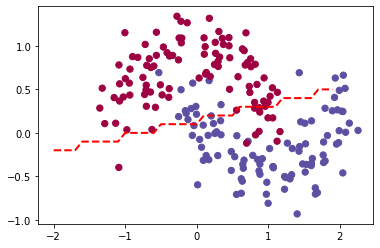

model with hidden layer of size 2:


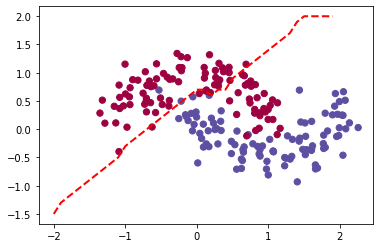

model with hidden layer of size 3:


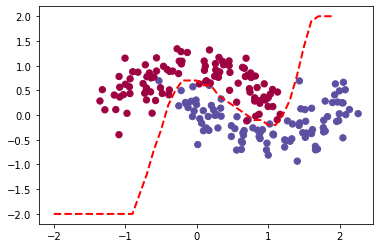

model with hidden layer of size 4:


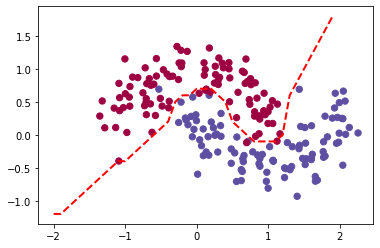

model with hidden layer of size 5:


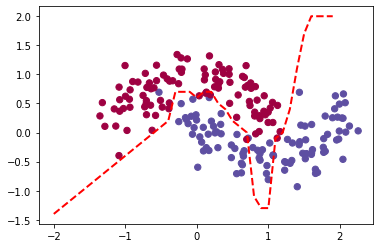

model with hidden layer of size 20:


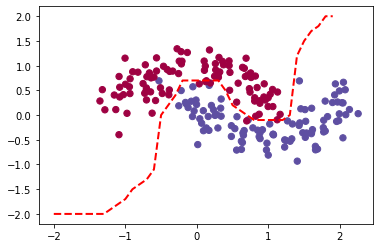

model with hidden layer of size 40:


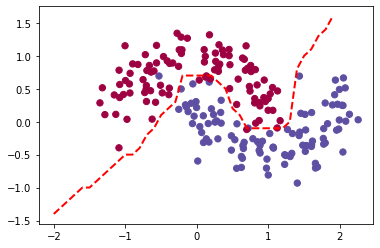

In [80]:
for hid_count in (1, 2, 3, 4, 5, 20, 40):
    print(f'model with hidden layer of size {hid_count}:')
    plotDec(build_model(hid_count,10000))

so we can see that when we increase hidden layers, the model overfit at some points. also when we have less than 3 hidden layers, it's not enough since the dicision boundary not fit very well.

# Q3

In [20]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)

In [21]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model_miniBatch(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        x1 = x[:len(x)//2]
        x2 = x[len(x)//2:]
        y1 = y[:len(y)//2]
        y2 = y[len(y)//2:]
        for newX,newY in ((x1,y1),(x2,y2)):
            # Forward propagation
            z1 = newX.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # Backpropagation
            delta3 = probs
            delta3[range(num_examples//2), newY] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(newX.T, delta2)
            db1 = np.sum(delta2, axis=0)
            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1
            # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
            # Assign new parameters to the model
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model

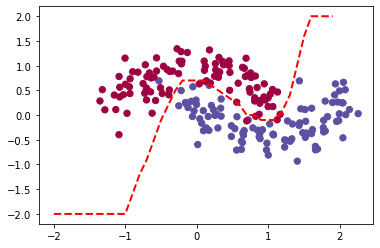

In [23]:
plotDec(build_model_miniBatch(3,10000))

# Q4

In [44]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model_miniBatch_annShed(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    e = epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        x1 = x[:len(x)//2]
        x2 = x[len(x)//2:]
        y1 = y[:len(y)//2]
        y2 = y[len(y)//2:]
        for newX,newY in ((x1,y1),(x2,y2)):
            # Forward propagation
            z1 = newX.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # Backpropagation
            delta3 = probs
            delta3[range(num_examples//2), newY] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(newX.T, delta2)
            db1 = np.sum(delta2, axis=0)
            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1
            # Gradient descent parameter update
            W1 += -e * dW1
            b1 += -e * db1
            W2 += -e * dW2
            b2 += -e * db2
            # Assign new parameters to the model
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
        e -= 10**(-7)
    return model

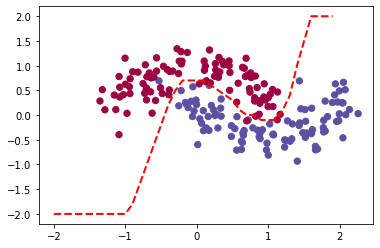

In [45]:
M = build_model_miniBatch_annShed(3)
plotDec(M)

# Q5

In [82]:
def sig(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)

In [92]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model_miniBatch_annShed_sig(nn_hdim, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    e = epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    #This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        x1 = x[:len(x)//2]
        x2 = x[len(x)//2:]
        y1 = y[:len(y)//2]
        y2 = y[len(y)//2:]
        for newX,newY in ((x1,y1),(x2,y2)):
            # Forward propagation
            z1 = newX.dot(W1) + b1
            a1 = sig(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # Backpropagation
            delta3 = probs
            delta3[range(num_examples//2), newY] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (a1*(1 - a1))
            dW1 = np.dot(newX.T, delta2)
            db1 = np.sum(delta2, axis=0)
            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1
            # Gradient descent parameter update
            W1 += -e * dW1
            b1 += -e * db1
            W2 += -e * dW2
            b2 += -e * db2
            # Assign new parameters to the model
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
        e -= 10**(-7)
    return model
# Helper function to predict an output (0 or 1)
def predict_sig(model, X):
    X = np.array(X)
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = sig(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)
def calculate_loss_sig(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x.dot(W1) + b1
    a1 = sig(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss
def plotDec_sig(M):
    preds = [[predict_sig(M,[i,j])[0] for j in np.arange(-2,2,0.1)] 
         for i in np.arange(-2,2,0.1)]
    p1s = []
    p2s = []
    for p1,arr in enumerate(preds):
        p1 = -2+p1*0.1
        p2 = (-2+arr.index(0)*0.1) if 0 in arr else 2
        p1s.append(p1)
        p2s.append(p2)
    plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.plot(p1s, p2s,'--', c='red', linewidth=2)
    plt.show()


model with hidden layer of size 2:


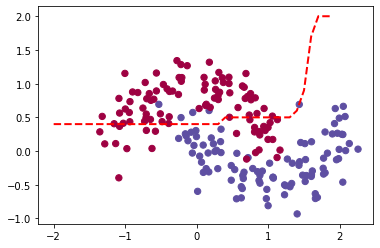

model with hidden layer of size 3:


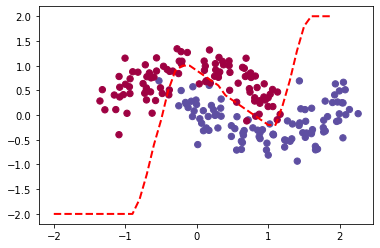

model with hidden layer of size 5:


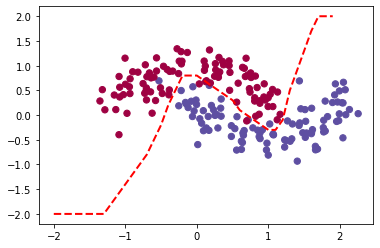

In [95]:
M3 = build_model_miniBatch_annShed_sig(2,5000)
M5 = build_model_miniBatch_annShed_sig(3,5000)
M10 = build_model_miniBatch_annShed_sig(5,5000)
print('model with hidden layer of size 2:')
plotDec(M3)
print('model with hidden layer of size 3:')
plotDec(M5)
print('model with hidden layer of size 5:')
plotDec(M10)

so tan hyperbolic is good as sigmoid function

# Q6

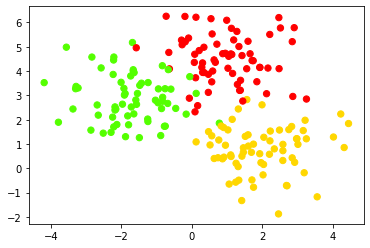

In [185]:
x, y = sklearn.datasets.make_blobs(n_samples=200, centers=3, 
                                   n_features=2,random_state=0)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.prism)
nn_output_dim = 3 # output layer dimensionality

In [186]:
M = build_model_miniBatch_annShed(3)

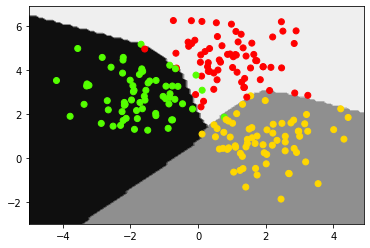

In [187]:
def plotMultiWay(M):
    p1, p2 = np.meshgrid(np.arange(-5,5,0.1), np.arange(-3,7,0.1))
    preds = predict(M,np.c_[p1.ravel(), p2.ravel()])  
    plt.contourf(p1, p2, preds.reshape(p1.shape) , cmap=plt.cm.binary) 
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.prism)
plotMultiWay(M)

# Q7

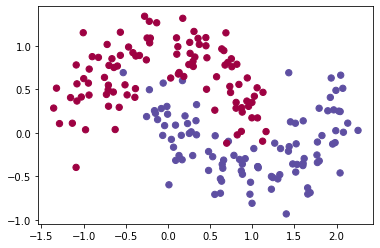

In [208]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
num_examples = len(x) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

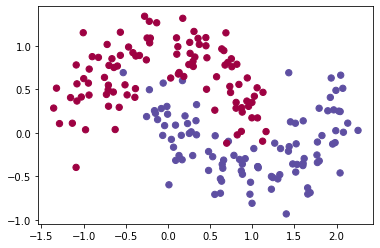

In [245]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
num_examples = len(x) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [246]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model_miniBatch_annShed_3hid(nn_hdim1,nn_hdim2, num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    e = epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim1) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim1))
    W2 = np.random.randn(nn_hdim1, nn_hdim2) / np.sqrt(nn_hdim1)
    b2 = np.zeros((1, nn_hdim2))
    #add new layer
    W3 = np.random.randn(nn_hdim2, nn_output_dim) / np.sqrt(nn_hdim2)
    b3 = np.zeros((1, nn_output_dim))
    # This is what we return at the end
    model = {}
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        x1 = x[:len(x)//2]
        x2 = x[len(x)//2:]
        y1 = y[:len(y)//2]
        y2 = y[len(y)//2:]
        for newX,newY in ((x1,y1),(x2,y2)):
            # Forward propagation
            z1 = newX.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            a2 = np.tanh(z2)
            z3 = a2.dot(W3) + b3
            exp_scores = np.exp(z3)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            # Backpropagation
            delta4 = probs
            delta4[range(num_examples // 2), newY] -= 1
            dW3 = (a2.T).dot(delta4)
            db3 = np.sum(delta4, axis=0, keepdims=True)
            delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(newX.T, delta2)
            db1 = np.sum(delta2, axis=0)
            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW3 += reg_lambda * W3
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1
            # Gradient descent parameter update
            W1 += -e * dW1
            b1 += -e * db1
            W2 += -e * dW2
            b2 += -e * db2
            W3 += -e * dW3
            b3 += -e * db3
            # Assign new parameters to the model
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
            # Optionally print the loss.
            # This is expensive because it uses the whole dataset.
        if print_loss and i % 1000 == 0:
            print ("Iteration:", i, "Loss:", calculate_loss(model))
        e -= 10**(-7)
    return model


def predict(model, X):
    X = np.array(X)
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #add new layer data
    W3, b3 = model['W3'], model['b3']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)
M = build_model_miniBatch_annShed_3hid(5,2)

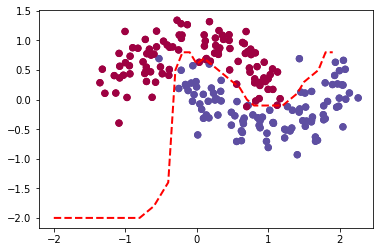

In [244]:
plotDec(M)